In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
print(cv2.__version__)

4.5.5


[[[27 39 49]
  [28 37 47]
  [25 35 45]
  ...
  [39 46 55]
  [46 53 62]
  [36 43 52]]

 [[24 33 43]
  [24 34 44]
  [34 44 54]
  ...
  [26 33 42]
  [30 37 46]
  [28 35 44]]

 [[23 32 42]
  [31 37 48]
  [34 46 56]
  ...
  [23 31 38]
  [21 29 36]
  [26 34 41]]

 ...

 [[29 42 50]
  [19 29 39]
  [23 30 39]
  ...
  [13 22 26]
  [14 23 27]
  [17 26 30]]

 [[16 29 37]
  [14 25 33]
  [27 34 43]
  ...
  [13 19 24]
  [13 22 26]
  [15 24 28]]

 [[13 26 34]
  [24 34 44]
  [26 33 42]
  ...
  [11 17 22]
  [11 20 24]
  [12 21 25]]]
(1406, 1552, 3)


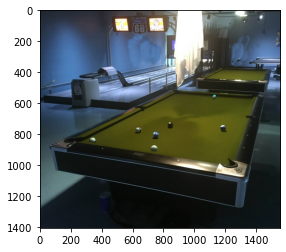

In [2]:
img = cv2.imread('pool table.jpg')
print(img)
print(img.shape)
plt.imshow(img)
plt.show()

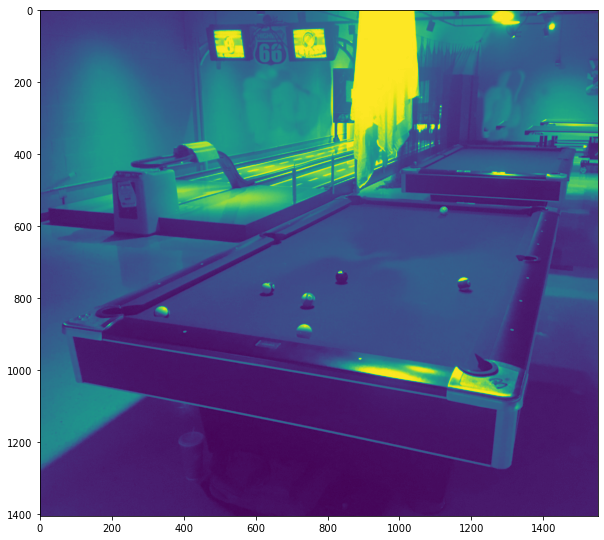

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(1406, 1552)


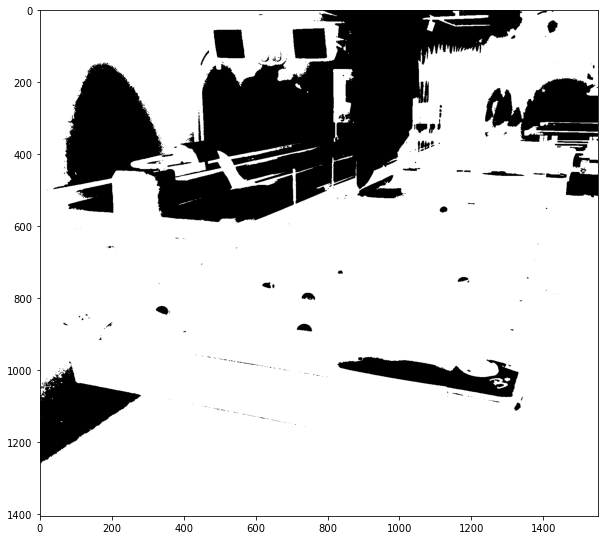

In [25]:
threshold_value= 250
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.GaussianBlur(gray_img, (3, 3), 0)
plt.figure(figsize=(10,10))
plt.imshow(gray_img)
plt.show()
ret, binary_img = cv2.threshold(gray_img, threshold_value, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#inverts image
img2 = ~binary_img
print(img2)
print(img2.shape)
plt.figure(figsize=(10,10))
plt.imshow(img2, 'gray')
plt.show()

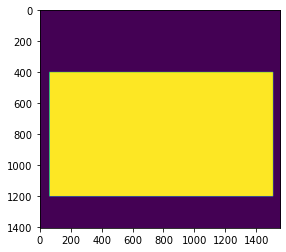

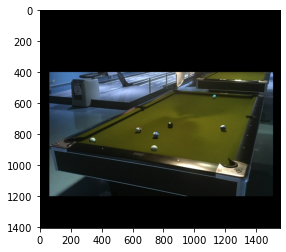

In [49]:
mask = np.zeros(img.shape[:2], dtype="uint8")
cv2.rectangle(mask, (60, 400), (1500, 1200), 255, -1)
plt.imshow(mask)
plt.show()
masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(masked)
plt.show()

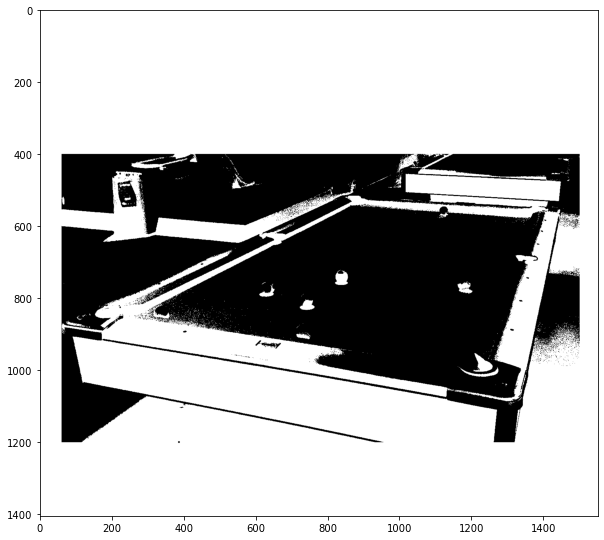

In [62]:
gray = cv2.cvtColor(masked,cv2.COLOR_BGR2GRAY)
threshold_value = 250
ret, binary_img = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
invert = ~binary_img
plt.figure(figsize=(10,10))
plt.imshow(invert, 'gray')
plt.show()

In [56]:
contours, hierarchy = cv2.findContours(invert.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)

In [57]:
print(len(contours))
print(contours[0])
cnt = contours[0]

2764
[[[ 385 1200]]

 [[ 386 1199]]

 [[ 387 1200]]

 [[ 386 1201]]]


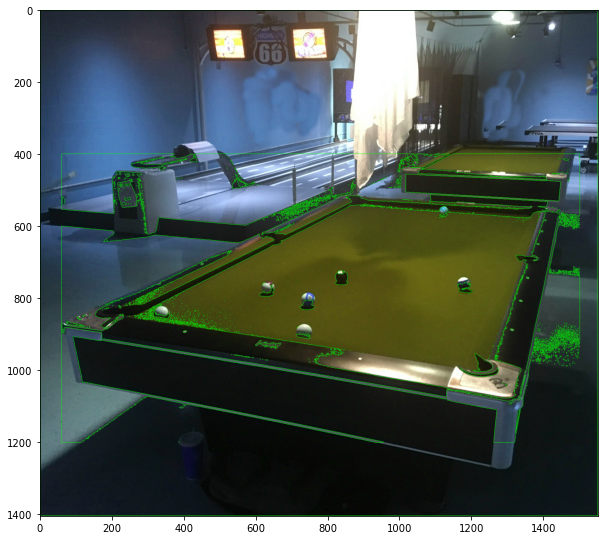

In [61]:
sortedContours = sorted(contours, key = lambda x: cv2.contourArea(x))
img3 = cv2.drawContours(img.copy(),sortedContours,-1,(0,255,0))
plt.figure(figsize=(10,10))
plt.imshow(img3,'gray')
plt.show() 

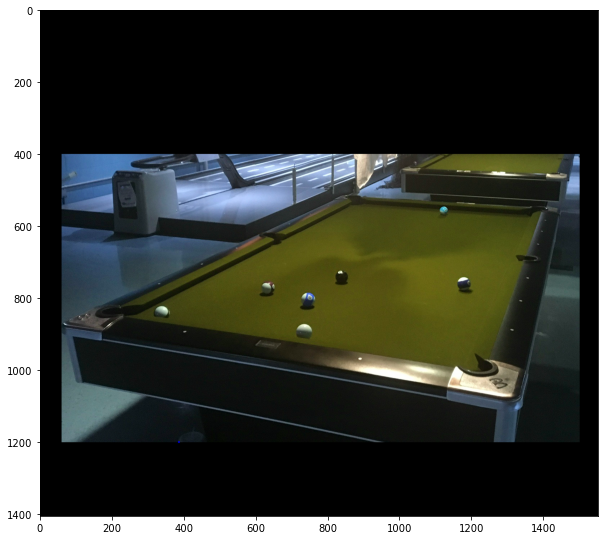

In [58]:
img_copy= img.copy
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img2 = cv2.drawContours(masked,[box],0,(0,0,255),2)
plt.figure(figsize=(10,10))
plt.imshow(img2)
plt.show()

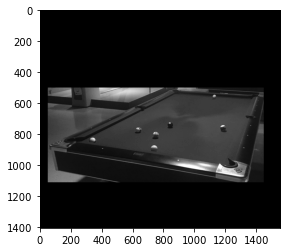

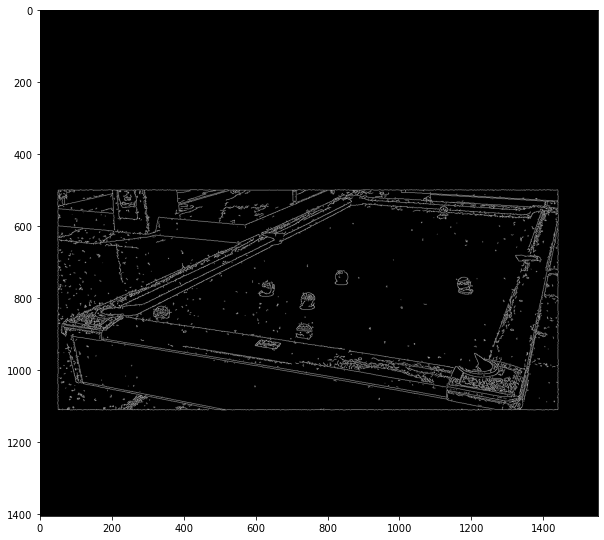

number of lines: (55, 1, 2)


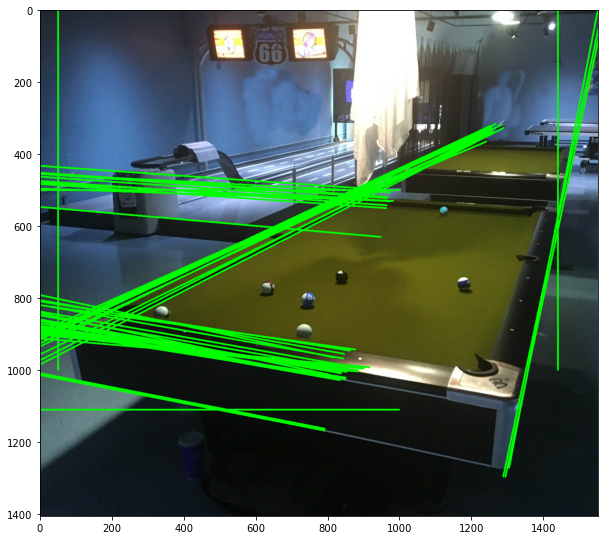

In [16]:
gray = cv2.cvtColor(masked,cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.show()

edges = cv2.Canny(gray,30,60)
plt.figure(figsize=(10,10))
plt.imshow(edges, cmap='gray')
plt.show()

lines = cv2.HoughLines(edges,1,np.pi/180,200)
print('number of lines: {}'.format(lines.shape))

#bg = np.zeros_like(img)
bg = img.copy()
for line in lines:
    rho,theta = tuple(line[0])
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(bg,(x1,y1),(x2,y2),(0,255,0),3)
plt.figure(figsize=(10,10))
plt.imshow(bg)
plt.show()